In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal, binom
import bplot as bp
from scipy.optimize import minimize
from scipy.special import loggamma
import patsy
import multiprocessing
from joblib import Parallel, delayed

from math314 import optim, pbootstrap as bootstrap

# 20 November 2019

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/elmhurst.csv")

X = patsy.dmatrix("~ family_income", data=df)
yX = np.c_[df["gift_aid"], X]

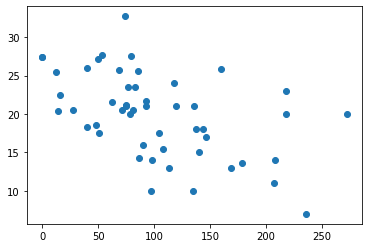

In [3]:
bp.point(df.family_income, df.gift_aid)

In [4]:
x = np.random.normal(size=101)
y = np.random.normal(size=101)
df = pd.DataFrame({"x":x, "y":y})
df.corr()

,x,y
x,1.000000,-0.096486
y,-0.096486,1.000000


## Correlation
$$-1\leq r\leq 1$$
We can call pandas corr() function to find a correlation between tables

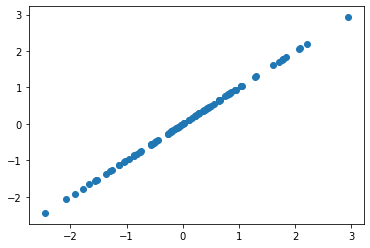

In [5]:
bp.point(df['x'], df['x'])

Since there is a perfect correlation between X and X, it's just all the points on a line. Perfect correlation is the value 1.

**Linear** -- Correlation only shows up for data that is obviously linear.

**Sign** -- This case is positive. As X goes up, the y axis goes up

**Strength** -- At correlation of 1, the correlation is max

**Association** -- We are finding, between two sets of data, an association. We are not going to figure out causation. 

We have "Perfect positive linear association" -- Our correlation is $1$



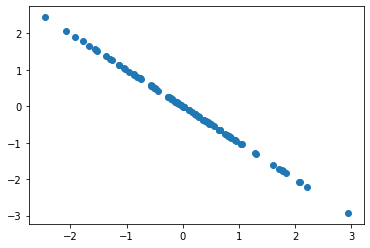

In [6]:
bp.point(df['x'], -df['x'])

This is perfect negative linear association. Perfect being strength, negative being sign.

,x,y
x,1.000000,0.993791
y,0.993791,1.000000


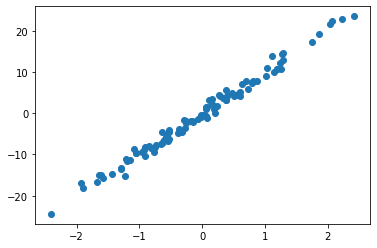

In [7]:
x = np.random.normal(size=101)
y = 10 * x + np.random.normal(size=101)
df = pd.DataFrame({"x":x, "y":y})
bp.point(df.x, df.y)
df.corr()

0.9570989950390097

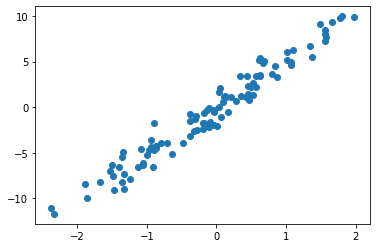

In [8]:
x = np.random.normal(size=101)
y = 5 * x + np.random.normal(size=101)
df = pd.DataFrame({"x":x, "y":y})
bp.point(df.x, df.y)
r = df.corr().y[0]
r*r

0.20221892429133773

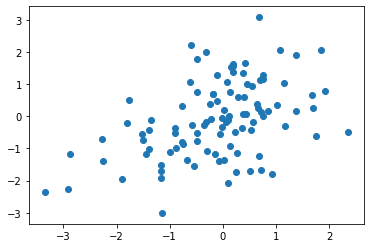

In [16]:
x = np.random.normal(size=101)
y = 0.5 * x + np.random.normal(size=101)
df = pd.DataFrame({"x":x, "y":y})
bp.point(df.x, df.y)
r = df.corr().y[0]
r*r

At this extreme, we have a weak, positive linear association, represented by r=0.36

,x,y
x,1.00000,0.07839
y,0.07839,1.00000


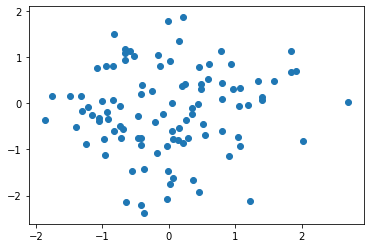

In [10]:
x = np.random.normal(size=101)
y = 0.1 * x + np.random.normal(size=101)
df = pd.DataFrame({"x":x, "y":y})
bp.point(df.x, df.y)
df.corr()

We now have a very, very weak positive linear association.

,x,y
x,1.000000,0.094741
y,0.094741,1.000000


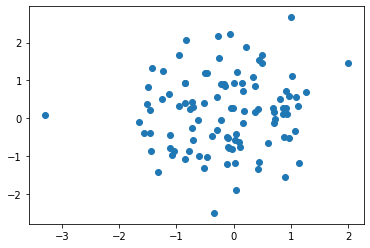

In [11]:
x = np.random.normal(size=101)
y = 0 * x + np.random.normal(size=101)
df = pd.DataFrame({"x":x, "y":y})
bp.point(df.x, df.y)
df.corr()

As r approaches 0, we have no correlation or association between our two variables. The only reason this isn't perfectly 0 is because we have only 101 observations

,x,y
x,1.000000,-0.994942
y,-0.994942,1.000000


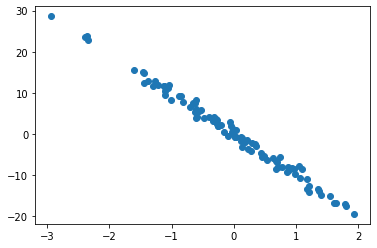

In [12]:
x = np.random.normal(size=101)
y = -10 * x + np.random.normal(size=101)
df = pd.DataFrame({"x":x, "y":y})
bp.point(df.x, df.y)
df.corr()

For this example, we have a strong negative linear association of r= -.99 

This is a perfect example of simple linear regression model.

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/elmhurst.csv")

X = patsy.dmatrix("~ family_income", data=df)
yX = np.c_[df["gift_aid"], X]
betahat = optim(yX)
r=(df.corr().gift_aid[0])
r*r

0.24855822177114614

This linear model explains 24.9% of the variation in gift aid.

As this percentage goes to 100%, the explanatory variable can perfectly explain the changes in y.

In [14]:
N = yX.shape[0]
mu = np.full(N, np.nan)
for n in range(N):
    mu[n] = np.sum(yX[n, 1:] * betahat)

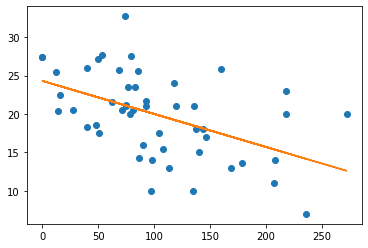

In [15]:
bp.point(df.family_income, df.gift_aid)
bp.line(df.family_income, mu, bp.color[1])